Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

enrollments[0]

{'account_key': '448',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_canceled': 'True',
 'is_udacity': 'True',
 'join_date': '2014-11-10',
 'status': 'canceled'}

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

print(enrollments[0])
print(daily_engagement[0])
print(project_submissions[0])

{'days_to_cancel': '65', 'status': 'canceled', 'account_key': '448', 'is_udacity': 'True', 'join_date': '2014-11-10', 'cancel_date': '2015-01-14', 'is_canceled': 'True'}
{'total_minutes_visited': '11.6793745', 'acct': '0', 'num_courses_visited': '1.0', 'utc_date': '2015-01-09', 'lessons_completed': '0.0', 'projects_completed': '0.0'}
{'creation_date': '2015-01-14', 'account_key': '256', 'lesson_key': '3176718735', 'assigned_rating': 'UNGRADED', 'completion_date': '2015-01-16', 'processing_state': 'EVALUATED'}


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_canceled': True,
 'is_udacity': True,
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'status': 'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [6]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
print('Number of rows in the enrollment table: ' + str(len(enrollments)))
print('Number of rows in the daily_engagement table: ' + str(len(daily_engagement)))
print('Number of rows in the project_submissions table: ' + str(len(project_submissions)))

enrollments_uniquestu = []
for a in enrollments:
     enrollments_uniquestu.append(a['account_key'])
print('Number of unique students in the enrollment table: ' + str(len(set(enrollments_uniquestu))))

daily_engagement_uniquestu = []
for b in daily_engagement:
     daily_engagement_uniquestu.append(b['acct'])
print('Number of unique students in the daily_engagement table: ' + str(len(set(daily_engagement_uniquestu))))

project_submissions_uniquestu = []
for c in project_submissions:
     project_submissions_uniquestu.append(c['account_key'])
print('Number of unique students in the project_submissions table: ' + str(len(set(project_submissions_uniquestu))))

Number of rows in the enrollment table: 1640
Number of rows in the daily_engagement table: 136240
Number of rows in the project_submissions table: 3642
Number of unique students in the enrollment table: 1302
Number of unique students in the daily_engagement table: 1237
Number of unique students in the project_submissions table: 743


## Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for engagement in daily_engagement:
    removed_item = engagement.pop('acct')
    engagement['account_key'] = removed_item

In [8]:
daily_engagement[0]['account_key']

'0'

## Missing Engagement Records

In [9]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
missing_engagement_records = []
for uniquestu in set(enrollments_uniquestu):
    if uniquestu not in set(daily_engagement_uniquestu): 
        missing_engagement_records.append(uniquestu)
        break
len(missing_engagement_records)

1

In [10]:
for enrollment_records in enrollments:
    if enrollment_records['account_key'] == missing_engagement_records[0]:
        print (enrollment_records)
        break

{'days_to_cancel': 0, 'status': 'canceled', 'account_key': '789', 'is_udacity': False, 'join_date': datetime.datetime(2015, 2, 6, 0, 0), 'cancel_date': datetime.datetime(2015, 2, 6, 0, 0), 'is_canceled': True}


In [11]:
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in set(daily_engagement_uniquestu):
        print(enrollment)
        break

{'days_to_cancel': 0, 'status': 'canceled', 'account_key': '1219', 'is_udacity': False, 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'is_canceled': True}


In [12]:
# number of students canceled within one day
students_num_cancel_oneday = []
new_enrollments = []
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in set(daily_engagement_uniquestu):
        students_num_cancel_oneday.append(student)
    else: 
        new_enrollments.append(enrollment)

In [13]:
unique_students = set()
for enrollment in new_enrollments:
    unique_students.add(enrollment['account_key'])
len(unique_students)

1237

In [14]:
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in set(daily_engagement_uniquestu) and enrollment['join_date'] != enrollment['cancel_date']:
        print(enrollment)        

{'days_to_cancel': 59, 'status': 'canceled', 'account_key': '1304', 'is_udacity': True, 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'is_canceled': True}
{'days_to_cancel': 99, 'status': 'canceled', 'account_key': '1304', 'is_udacity': True, 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'is_canceled': True}
{'days_to_cancel': None, 'status': 'current', 'account_key': '1101', 'is_udacity': True, 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'cancel_date': None, 'is_canceled': False}


## Checking for More Problem Records

In [15]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

## Tracking Down the Remaining Problems

In [16]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [17]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [18]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print (len(non_udacity_enrollments))
print (len(non_udacity_engagement))
print (len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [19]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    if enrollment['days_to_cancel'] == None:
        paid_students[enrollment['account_key']] = enrollment['join_date']
    elif  enrollment['days_to_cancel'] > 7:
        paid_students[enrollment['account_key']] = enrollment['join_date']

len(paid_students)     

995

In [20]:
## A better way to solve above 

paid_students = {}
for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        # Changed what enrollment date was saved for each student
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date
        
len(paid_students)

## Question: are the students in the dict unique? 

995

## Getting Data from First Week

In [21]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [22]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []
for engagement in non_udacity_engagement:
    if engagement['account_key'] in paid_students and within_one_week(paid_students[engagement['account_key']], engagement['utc_date']):
        paid_engagement_in_first_week.append(engagement)

len(paid_engagement_in_first_week)

6919

In [23]:
# Another way to solve the above PART 1
# Define a function to removed non-paid records

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [24]:
# Another way to solve the above PART 2
# Remove non-paid records/ free-trial records in three tables

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print (len(paid_enrollments))
print (len(paid_engagement))
print (len(paid_submissions))

1293
134549
3618


In [25]:
# Another way to solve the above PART 3
# Tip: Easier to read while assign values to function variables

paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [26]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

print(engagement_by_account[0])

[]


In [27]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [28]:
import numpy as np

# Summarize the data about minutes spent in the classroom
# total_minutes = total_minutes_by_account.values()
total_minutes = list(total_minutes_by_account.values())
print ('Mean:', np.mean(total_minutes))
print ('Standard deviation:', np.std(total_minutes))
print ('Minimum:', np.min(total_minutes))
print ('Maximum:', np.max(total_minutes))
search_max = np.max(total_minutes)
print('Search Max:', search_max)

Mean: 306.400386666
Standard deviation: 412.903824751
Minimum: 0.0
Maximum: 3564.7332645
Search Max: 3564.7332645


## Debugging Data Analysis Code

In [29]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

for total_minutes_key, total_minutes_value in total_minutes_by_account.items():
    if total_minutes_value == search_max:
        print(total_minutes_value)
        print(total_minutes_key)
        search_max_account = total_minutes_key
        
for key, value in engagement_by_account.items():
    if key == search_max_account:
        print (value)

3564.7332644989997
163
[{'total_minutes_visited': 850.519339666, 'account_key': '163', 'num_courses_visited': 4, 'utc_date': datetime.datetime(2015, 7, 9, 0, 0), 'lessons_completed': 4, 'projects_completed': 0}, {'total_minutes_visited': 872.633923334, 'account_key': '163', 'num_courses_visited': 6, 'utc_date': datetime.datetime(2015, 7, 10, 0, 0), 'lessons_completed': 6, 'projects_completed': 0}, {'total_minutes_visited': 777.018903666, 'account_key': '163', 'num_courses_visited': 2, 'utc_date': datetime.datetime(2015, 7, 11, 0, 0), 'lessons_completed': 6, 'projects_completed': 0}, {'total_minutes_visited': 294.568774, 'account_key': '163', 'num_courses_visited': 1, 'utc_date': datetime.datetime(2015, 7, 12, 0, 0), 'lessons_completed': 2, 'projects_completed': 0}, {'total_minutes_visited': 471.2139785, 'account_key': '163', 'num_courses_visited': 3, 'utc_date': datetime.datetime(2015, 7, 13, 0, 0), 'lessons_completed': 1, 'projects_completed': 0}, {'total_minutes_visited': 298.7783453

## Lessons Completed in First Week

In [30]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
# engagement_by_account

total_lessons_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_lessons = 0
    for engagement_record in engagement_for_student:
        total_lessons += engagement_record['lessons_completed']
    total_lessons_by_account[account_key] = total_lessons

In [31]:
import numpy as np

total_lessons = list(total_lessons_by_account.values())
print('Mean: ', np.mean(total_lessons))
print('Standard Deviation: ', np.std(total_lessons))
print('Min: ', np.min(total_lessons))
print('Max: ', np.max(total_lessons))

Mean:  1.63453815261
Standard Deviation:  3.0015009444
Min:  0
Max:  36


In [32]:
## Use function to solve previous problems PART I

from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data
        
engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')
print(engagement_by_account[0])

[]


In [33]:
# Use function to solve previous problems PART II

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data
        
total_lessons_by_account = sum_grouped_items(engagement_by_account,  'lessons_completed')  
print(total_lessons_by_account[0])

0


In [34]:
# Use function to solve previous problems PART III

import numpy as np

def describe_data(data):   
    print('Mean: ', np.mean(data))
    print('Standard Deviation: ', np.std(data))
    print('Min: ', np.min(data))
    print('Max: ', np.max(data))
    
total_lessons = list(total_lessons_by_account.values())
describe_data(total_lessons)

Mean:  1.63453815261
Standard Deviation:  3.0015009444
Min:  0
Max:  36


## Number of Visits in First Week

In [35]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
# add a field to grouped_data engagement_by_account has_visited 1 or 0

for account_key, engagement_student in engagement_by_account.items():
    for engagement_record in engagement_student:
        if engagement_record['num_courses_visited'] > 0:
            engagement_record['has_visited'] = 1
        elif engagement_record['num_courses_visited'] == 0 :
            engagement_record['has_visited'] = 0

total_days_visitedcourses_by_account = sum_grouped_items(engagement_by_account, 'has_visited')

total_days_visitedcourses = list(total_days_visitedcourses_by_account.values())
describe_data(total_days_visitedcourses)

Mean:  2.86445783133
Standard Deviation:  2.25589406653
Min:  0
Max:  7


## Splitting out Passing Students

In [36]:
paid_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

In [37]:
paid_engagement_in_first_week[0]

{'account_key': '0',
 'has_visited': 1,
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [38]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.
# paid_submissions
# paid_engagement_in_first_week
# engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')
# engagement_by_account

subway_project_lesson_keys = ['746169184', '3176718735']

account_key_list = []
account_key_list_notpass = []
for paid_submission in paid_submissions:
    if paid_submission['lesson_key'] in subway_project_lesson_keys:
        if paid_submission['assigned_rating'] == 'PASSED' or paid_submission['assigned_rating'] == 'DISTINCTION':
            account_key_list.append(paid_submission['account_key'])

"""for paid_submission in paid_submissions:
    if paid_submission['lesson_key'] in subway_project_lesson_keys:
        if paid_submission['assigned_rating'] != 'PASSED' and paid_submission['account_key'] not in account_key_list:
                account_key_list_notpass.append(paid_submission['account_key'])"""
            

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in set(account_key_list):
        passing_engagement.append(engagement_record)
    elif engagement_record['account_key'] not in account_key_list:
        non_passing_engagement.append(engagement_record)

#print(account_key_list[0: 100])
#print(account_key_list_notpass)
#print(len(paid_submissions))
#print(len(paid_engagement_in_first_week))
#print(len(engagement_by_account))
print(len(set(account_key_list)))
#print(len(account_key_list_notpass))
print(len(passing_engagement))
print(len(non_passing_engagement))

647
4527
2392


In [39]:
assigned_rating_set = set()
for paid_submission in paid_submissions:
    assigned_rating_set.add(paid_submission['assigned_rating'])
print(assigned_rating_set)

{'', 'DISTINCTION', 'INCOMPLETE', 'PASSED', 'UNGRADED'}


In [40]:
passing_engagement[0]

{'account_key': '0',
 'has_visited': 1,
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [41]:
paid_engagement_in_first_week[0]

{'account_key': '0',
 'has_visited': 1,
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

## Comparing the Two Student Groups

In [42]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

In [43]:
# engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

In [44]:
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

In [45]:
import numpy as np

def describe_data(data):   
    print('Mean: ', np.mean(data))
    print('Standard Deviation: ', np.std(data))
    print('Min: ', np.min(data))
    print('Max: ', np.max(data))

In [63]:
# minutes spent in the classroom
# group_data(data, key_name)
# sum_grouped_items(grouped_data, field_name)
# describe_data(data)



passing_engagement_by_account = group_data(passing_engagement, 'account_key')
total_minutes_passing_eng_by_account = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')

total_minutes_pe = list(total_minutes_passing_eng_by_account.values())
describe_data(total_minutes_pe)

#----> 9 total_minutes_pe = list(total_minutes_passing_eng_by_account.value())
#     10 describe_data(total_minutes_pe)

# AttributeError: 'dict' object has no attribute 'value'

# *** values instead of value!!!

Mean:  394.586046484
Standard Deviation:  448.499519327
Min:  0.0
Max:  3564.7332645


In [64]:
# non_passing
# minutes spent

non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')
total_minutes_non_passing_eng_by_account = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')

total_minutes_npe = list(total_minutes_non_passing_eng_by_account.values())
describe_data(total_minutes_npe)

Mean:  143.326474267
Standard Deviation:  269.538619011
Min:  0.0
Max:  1768.52274933


In [48]:
# non_passing students spent relatively less total minutes on courses than passing students

In [66]:
# lessons completed

passing_engagement_by_account = group_data(passing_engagement, 'account_key')
total_lessons_passing_eng_by_account = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')

total_lessons_pe = list(total_lessons_passing_eng_by_account.values())
describe_data(total_lessons_pe)

Mean:  2.05255023184
Standard Deviation:  3.14222705558
Min:  0
Max:  36


In [67]:
# non_passing
# lessons completed

non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')
total_lessons_non_passing_eng_by_account = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')

total_lessons_npe = list(total_lessons_non_passing_eng_by_account.values())
describe_data(total_lessons_npe)

Mean:  0.862068965517
Standard Deviation:  2.54915994183
Min:  0
Max:  27


In [51]:
# non_passing students completed relatively less lessons than passing students

In [69]:
# days_visited

passing_engagement_by_account = group_data(passing_engagement, 'account_key')
total_days_passing_eng_by_account = sum_grouped_items(passing_engagement_by_account, 'has_visited')
                                                      
total_days_pe = list(total_days_passing_eng_by_account.values())
describe_data(total_days_pe)

Mean:  3.38485316847
Standard Deviation:  2.25882147092
Min:  0
Max:  7


In [70]:
# non_passing
# days_visited

non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')
total_days_non_passing_eng_by_account = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')
                                                      
total_days_npe = list(total_days_non_passing_eng_by_account.values())
describe_data(total_days_npe)

Mean:  1.90517241379
Standard Deviation:  1.90573144136
Min:  0
Max:  7


In [54]:
# non_passing students spend relatively fewer days of engagement than passing students

# In all, passing students group are more engaged in lessons and projects than non_passing student group.

## Making Histograms

In [55]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

In [58]:
# The line %matplotlib inline is specifically for IPython notebook, and 
# causes your plots to appear in your notebook rather than a new window. 
# If you are not using IPython notebook, you should not include this line, 
# and instead you should add the line plt.show() at the bottom 
# to show the plot in a new window.

(array([ 3.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

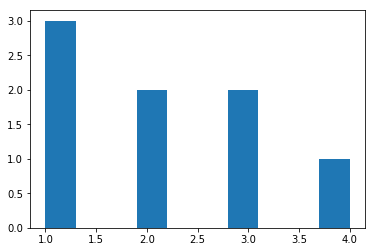

In [59]:
# Example

data = [1, 2, 1, 3, 3, 1, 4, 2]

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data)

(array([ 370.,  155.,   83.,   19.,   10.,    4.,    2.,    3.,    0.,    1.]),
 array([    0.        ,   356.47332645,   712.9466529 ,  1069.41997935,
         1425.8933058 ,  1782.36663225,  2138.8399587 ,  2495.31328515,
         2851.7866116 ,  3208.25993805,  3564.7332645 ]),
 <a list of 10 Patch objects>)

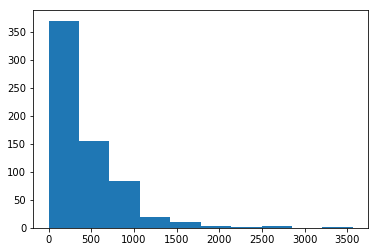

In [65]:
# minutes spent in the classroom
# passing student histogram

data = total_minutes_pe # list(total_minutes_passing_eng_by_account.values())

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data)

(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

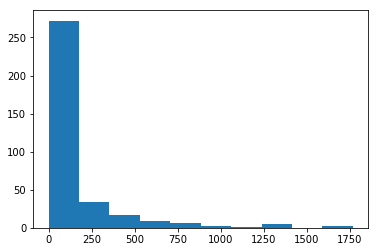

In [62]:
# non_passing
# minutes spent

data = total_minutes_npe

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data)

(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

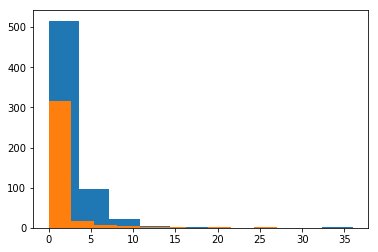

In [68]:
# lessons completed

data1 = total_lessons_pe # passing students
data2 = total_lessons_npe # non_passing students

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data1)
plt.hist(data2)

(array([ 97.,  90.,  56.,   0.,  41.,  15.,   0.,  24.,  17.,   8.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

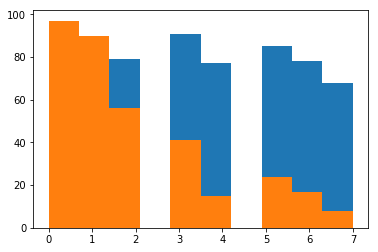

In [71]:
# days_visited

data1 = total_days_pe    # passing students
data2 = total_days_npe   # non_passing students

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data1)
plt.hist(data2)

In [73]:
# combine histogram with describe data using functions

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def describe_data(data):   
    print('Mean: ', np.mean(data))
    print('Standard Deviation: ', np.std(data))
    print('Min: ', np.min(data))
    print('Max: ', np.max(data))

    plt.hist(data)

Passing students total minutes visited:
Mean:  394.586046484
Standard Deviation:  448.499519327
Min:  0.0
Max:  3564.7332645

Non_passing students total minutes visited:
Mean:  143.326474267
Standard Deviation:  269.538619011
Min:  0.0
Max:  1768.52274933


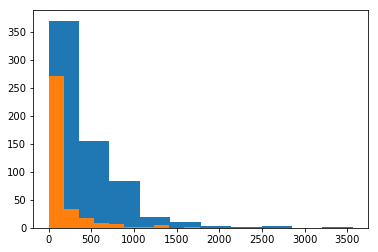

In [75]:
print ("Passing students total minutes visited:")
describe_data(total_minutes_pe)
print ("\nNon_passing students total minutes visited:")
describe_data(total_minutes_npe)

Passing students total lessons visited:
Mean:  2.05255023184
Standard Deviation:  3.14222705558
Min:  0
Max:  36

Non_passing students total lessons visited:
Mean:  0.862068965517
Standard Deviation:  2.54915994183
Min:  0
Max:  27


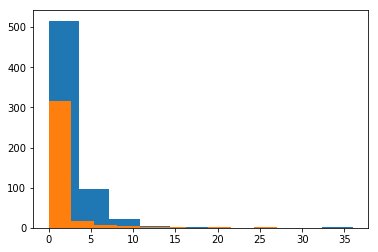

In [76]:
print ("Passing students total lessons visited:")
describe_data(total_lessons_pe)
print ("\nNon_passing students total lessons visited:")
describe_data(total_lessons_npe)

Passing students total days visited:
Mean:  3.38485316847
Standard Deviation:  2.25882147092
Min:  0
Max:  7

Non_passing students total days visited:
Mean:  1.90517241379
Standard Deviation:  1.90573144136
Min:  0
Max:  7


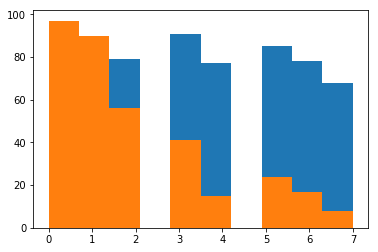

In [77]:
print ("Passing students total days visited:")
describe_data(total_days_pe)
print ("\nNon_passing students total days visited:")
describe_data(total_days_npe)

In [78]:
# Q: Why the last histogram is not continuous?

# A: Solved by adding bins argument such as bins = 20 
# A: Bins set to 8 is much better

## Improving Plots and Sharing Findings

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

In [ ]:
# plt.xlabel("Label for x axis")
# plt.ylabel("Label for y axis")
# plt.title("Title of plot")
# Making plots look nicer with seaborn

# plt.hist(data, bins=20)

In [116]:
# Adding extra arguments to your plot
# One common argument to pass is the bins argument, 
#  which sets the number of bins used by your histogram.

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def describe_data(data):   
    print('Mean: ', np.mean(data))
    print('Standard Deviation: ', np.std(data))
    print('Min: ', np.min(data))
    print('Max: ', np.max(data))

    plt.hist(data, bins=20)

Passing students total days visited:
Mean:  3.38485316847
Standard Deviation:  2.25882147092
Min:  0
Max:  7

Non_passing students total days visited:
Mean:  1.90517241379
Standard Deviation:  1.90573144136
Min:  0
Max:  7


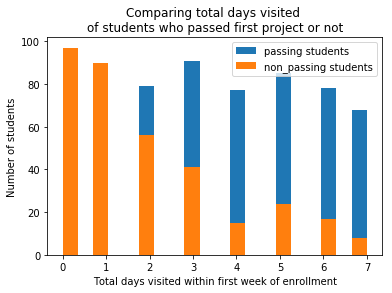

In [117]:
print ("Passing students total days visited:")
describe_data(total_days_pe)
print ("\nNon_passing students total days visited:")
describe_data(total_days_npe)
plt.xlabel("Total days visited within first week of enrollment")
plt.ylabel("Number of students")
plt.title("Comparing total days visited \nof students who passed first project or not")
plt.legend(('passing students', 'non_passing students'))  # adding legend names as color bar labels

In [105]:
# Q: Prevous figure the 0 1 catogories non_passing students
#   is overlapping with passing students and is shading the 
#   passing students data. How to improve on this issue?

In [205]:
# Use seaborn to improve visualization

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

def describe_data(data):   
    print('Mean: ', np.mean(data))
    print('Standard Deviation: ', np.std(data))
    print('Min: ', np.min(data))
    print('Max: ', np.max(data))

#    sns.distplot(data, bins=8, kde=False, rug = True, label = bar_label)

In [206]:
# Set seaborn themes
# Seaborn figure styles http://seaborn.pydata.org/tutorial/aesthetics.html
# There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks. 
#     They are each suited to different applications and personal preferences. 
#     The default theme is darkgrid. As mentioned above, the grid helps the plot serve 
#     as a lookup table for quantitative information, and the white-on grey helps to 
#     keep the grid from competing with lines that represent data. 
#     The whitegrid theme is similar, but it is better suited to plots with heavy data elements
# Previous style is like 'ticks'

sns.set_style("darkgrid")

In [207]:
# make plot bigger

sns.set(rc={'figure.figsize':(9,6)})

In [208]:
# make font size bigger

sns.set_context("talk", font_scale=1.4)

Passing students total days visited:
Mean:  3.38485316847
Standard Deviation:  2.25882147092
Min:  0
Max:  7

Non_passing students total days visited:
Mean:  1.90517241379
Standard Deviation:  1.90573144136
Min:  0
Max:  7


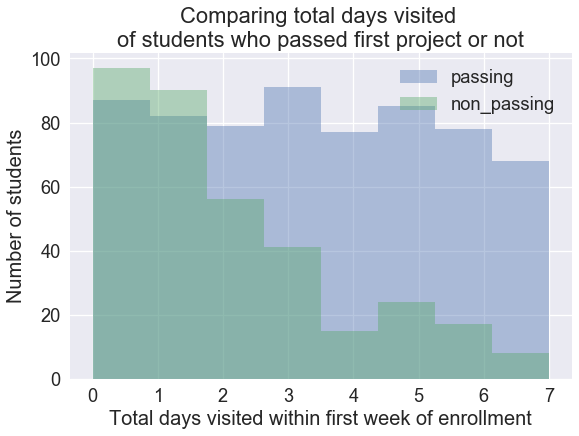

In [209]:
print ("Passing students total days visited:")
describe_data(total_days_pe)
sns.distplot(total_days_pe, bins=8, kde=False, label = "passing")
print ("\nNon_passing students total days visited:")
describe_data(total_days_npe)
sns.distplot(total_days_npe, bins=8, kde=False, label = "non_passing")
plt.xlabel("Total days visited within first week of enrollment")
plt.ylabel("Number of students")
plt.title("Comparing total days visited \nof students who passed first project or not")
plt.legend()

In [ ]:
# While using seaborn to plot. I noticed the caculation takes longer time.